In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("D:\Programming and Coding\Applied Statistics Lab Project\Dataset.csv")
df.head

<bound method NDFrame.head of      Stars                                           Comments  sentiments  \
0      4.0  Really interesting book, it will teach us many...         4.0   
1      4.0  "The Alchemist " is a book for ones who love b...         4.0   
2      5.0  This book is amazing. It changes one perspecti...         5.0   
3      4.0            Good book to have of you Are a beginner         4.0   
4      5.0  Loved it, the story was amazing and something ...         5.0   
..     ...                                                ...         ...   
994    NaN                                                NaN         NaN   
995    NaN                                                NaN         NaN   
996    NaN                                                NaN         NaN   
997    NaN                                                NaN         NaN   
998    NaN                                                NaN         NaN   

     positive  negative  class  
0         1.

In [4]:
df.isna().sum()

Stars         620
Comments      620
sentiments    620
positive      620
negative      620
class         620
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df

,Stars,Comments,sentiments,positive,negative,class
0,4.0,"Really interesting book, it will teach us many...",4.0,1.0,1.0,1.0
1,4.0,"""The Alchemist "" is a book for ones who love b...",4.0,5.0,0.0,1.0
2,5.0,This book is amazing. It changes one perspecti...,5.0,1.0,0.0,1.0
3,4.0,Good book to have of you Are a beginner,4.0,1.0,0.0,1.0
4,5.0,"Loved it, the story was amazing and something ...",5.0,2.0,0.0,1.0
...,...,...,...,...,...,...
374,2.0,"Pages feel like rough paper, hard, after repla...",2.0,1.0,1.0,0.0
375,2.0,It is more like a religious book (with words l...,2.0,2.0,0.0,1.0
376,1.0,It a not a special book. Just with basic know ...,1.0,0.0,0.0,0.0
377,1.0,Entire book revolves around two things conscio...,1.0,0.0,0.0,0.0


In [10]:
df.isna().sum()

Stars         0
Comments      0
sentiments    0
positive      0
negative      0
class         0
dtype: int64

In [12]:
df.columns

Index(['Stars', 'Comments', 'sentiments', 'positive', 'negative', 'class'], dtype='object')

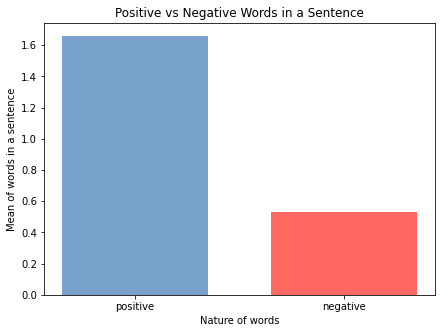

In [29]:
fig = plt.figure(figsize = (7, 5))
plt.bar(['positive','negative'], [df['positive'].mean(), df['negative'].mean()], 
        color=['#78A2CC', '#FF6961'], width=0.7)
plt.xlabel('Nature of words')
plt.ylabel('Mean of words in a sentence')
plt.title('Positive vs Negative Words in a Sentence')
plt.show()

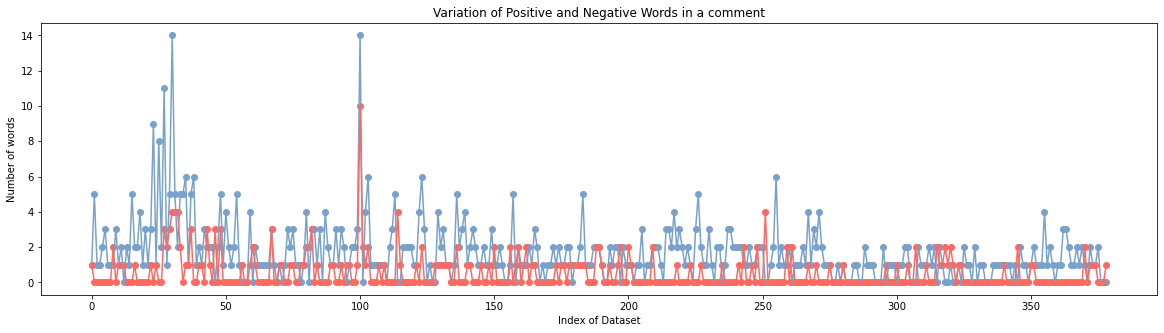

In [50]:
fig = plt.figure(figsize = (20, 5))
plt.plot(range(0, len(df['positive'])), df['positive'], color='#78A2CC')
plt.scatter(range(0, len(df['positive'])), df['positive'], color='#78A2CC')
plt.plot(range(0, len(df['positive'])), df['negative'], color='#FF6961')
plt.scatter(range(0, len(df['positive'])), df['negative'], color='#FF6961')
plt.xlabel('Index of Dataset')
plt.ylabel('Number of words')
plt.title('Variation of Positive and Negative Words in a comment')
plt.show()

In [52]:
x = df.drop(['Comments', 'sentiments', 'class'], axis=1)
y = df['class']

In [53]:
x.head

<bound method NDFrame.head of      Stars  positive  negative
0      4.0       1.0       1.0
1      4.0       5.0       0.0
2      5.0       1.0       0.0
3      4.0       1.0       0.0
4      5.0       2.0       0.0
..     ...       ...       ...
374    2.0       1.0       1.0
375    2.0       2.0       0.0
376    1.0       0.0       0.0
377    1.0       0.0       0.0
378    1.0       0.0       1.0

[379 rows x 3 columns]>

In [54]:
y.head

<bound method NDFrame.head of 0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
374    0.0
375    1.0
376    0.0
377    0.0
378    0.0
Name: class, Length: 379, dtype: float64>

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [56]:
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8631578947368421

In [57]:
model.predict(x_test)

array([1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 0.])

In [61]:
arr = np.asarray(y_test)
arr

array([1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 1.])

In [63]:
lr_cm = confusion_matrix(y_test, model.predict(x_test))
lr_cm

array([[26,  6],
       [ 7, 56]], dtype=int64)